In [4]:
import numpy as np
import pandas as pd
import os 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import time 
import warnings
from sklearn import svm
from sklearn.model_selection import GridSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')

print(os.listdir("../Input Files/Digit Recognizer"))

['test.csv', 'train.csv']


In [14]:
data = pd.read_csv('../Input Files/Digit Recognizer/train.csv')

In [15]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
label = data.label
data = data.drop('label',axis=1)
print("Data Shape: ",data.shape)
print("Label Shape: ", label.shape)

Data Shape:  (42000, 784)
Label Shape:  (42000,)


In [23]:
train_0.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


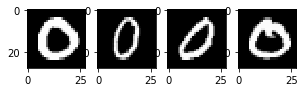

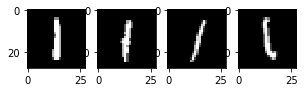

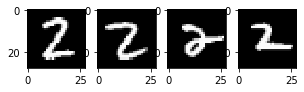

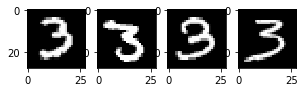

In [18]:
for x in range(0,4):
    train_0=data[label==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))
    for x in range(1,5):
        ax1=plt.subplot(1,20, x)
        ax1.imshow(data_new[x],cmap='gray')

Text(0, 0.5, 'Frequency')

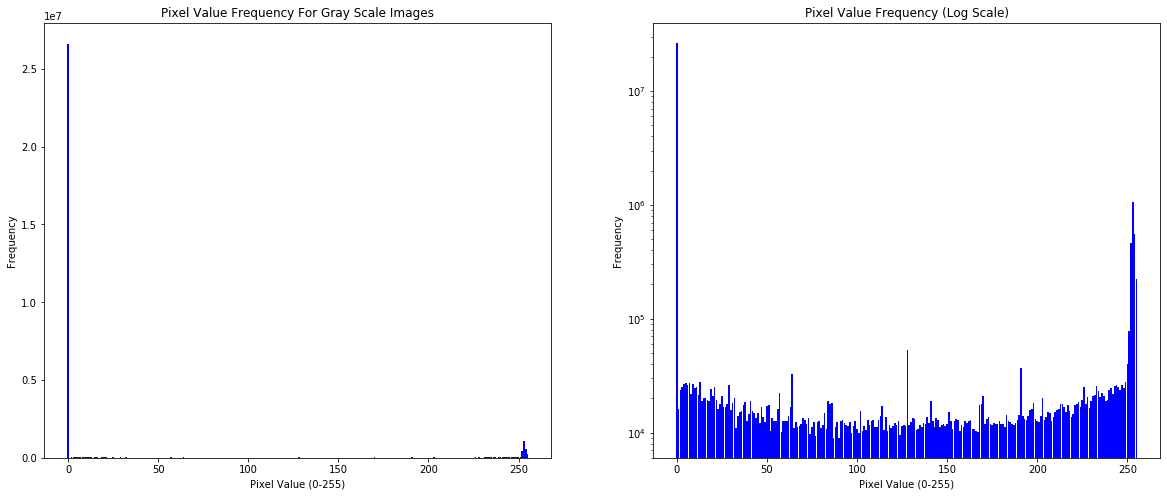

In [48]:
y = pd.value_counts(data.values.ravel()).sort_index()
N = len(y)
x = range(N)
width = 0.9
plt.figure(figsize=[20,8])
ax1=plt.subplot(1,2,1)
ax1.bar(x,y,width, color='blue')
plt.title('Pixel Value Frequency For Gray Scale Images')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

ax2=plt.subplot(1, 2,2)
ax2.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

# split 80% data into validation set

In [56]:
train, test, train_labels, test_labels = train_test_split(data,label, train_size = 0.8, random_state=7)

In [53]:
i = 5000;
score = []
fittime = []
scoretime = []
clf = svm.SVC(random_state=7)

In [54]:
print("default parameters inside the svm algo", clf.get_params)

default parameters inside the svm algo <bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=7,
    shrinking=True, tol=0.001, verbose=False)>


# Case - 1 | default SVM param

In [126]:
start_time = time.time()
clf.fit(train[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))

Time consumed to fit model:  00:00:10


In [127]:
start_time = time.time()
score=clf.score(test,test_labels)
print("Accuary for grayscale: ",score)
scoretime = time.time() - start_time
print('Time consumed to score: ', time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case1=[score, fittime, scoretime]

Accuary for grayscale:  0.9122619047619047
Time consumed to score:  00:00:23


---

# Case - 2 | change grayscale into black and white

In [128]:
test_b = test
train_b = train

In [129]:
test_b[test_b>0]=1

In [130]:
train_b[train_b>0]=1

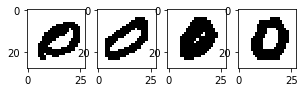

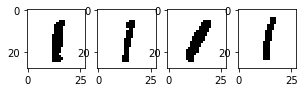

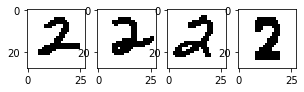

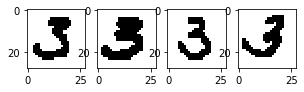

In [131]:
for x in range(0,4):
    train_0=train_b[train_labels==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='binary')

In [132]:
start_time = time.time()
clf.fit(train_b[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ", time.strftime("%H:%M:%S", time.gmtime(fittime)))
score = clf.score(test_b, test_labels)
print("Accuracy for binary: ",score)
case2=[score,fittime,scoretime]

Time consumed to fit model:  00:00:11
Accuracy for binary:  0.9122619047619047


In [ ]:
# the accuracy case 2 is 90% way higher than case 1 10%
# high dimensionaly of data makin computational time high. lets reduce the dimensions using pca.

# Case - 3 | grayscale + dimensionality reduction

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

In [90]:
# standardize the data
sc = StandardScaler().fit(train)
X_std_train = sc.transform(train)
X_std_test = sc.transform(test)

In [91]:
# if n_components is not set then all components are stored
sklearn_pca = sklearnPCA().fit(X_std_train)
train_pca = sklearn_pca.transform(X_std_train)b
test_pca = sklearn_pca.transform(X_std_test)

In [95]:
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

Text(0, 0.5, 'Variance')

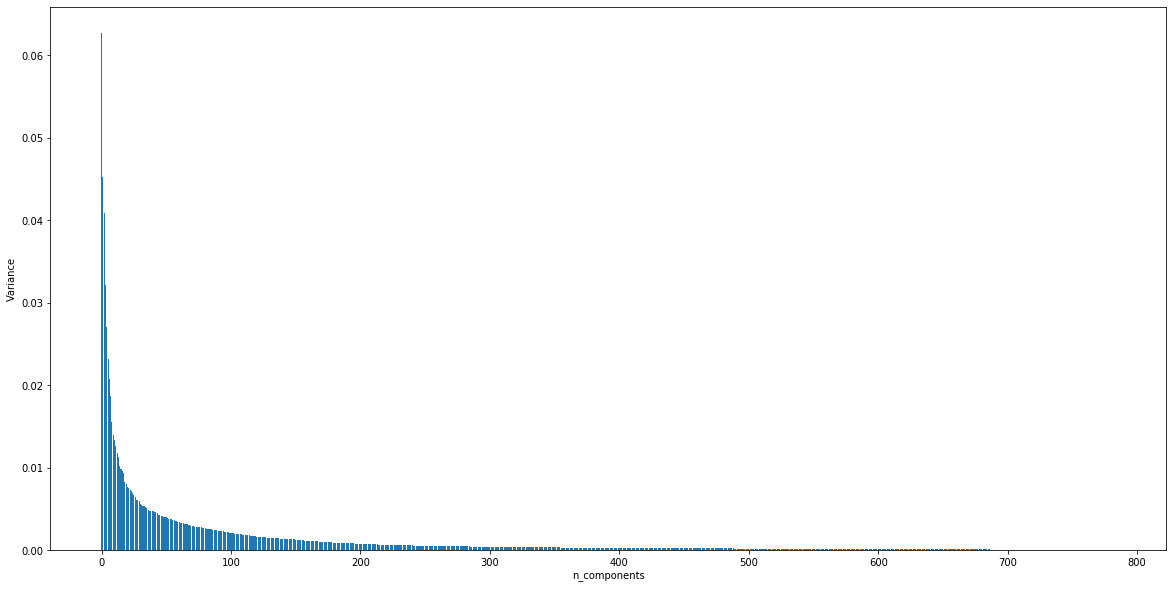

In [97]:
plt.figure(figsize=(20,10))
ind = np.arange(len(var_per))
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [120]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
#be aware of this fit and transform!
train_pca = sklearn_pca.fit_transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca.shape)

Keeping 90% Info with  287  components
Shape before PCA for Train:  (33600, 784)
Shape after PCA for Train:  (33600, 287)
Shape before PCA for Test:  (8400, 784)
Shape after PCA for Test:  (8400, 287)


In [121]:
start_time = time.time()
clf.fit(train_pca[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("time consumed to fit the model: ", time.strftime("%H:%M:%S", time.gmtime(fittime)))


start_time = time.time()
score = clf.score(test_pca, test_labels.values.ravel())
print("accuracy for grayscale and pca", score)
scoretime = time.time() - start_time
print("time consumed to score model: ", time.strftime("%H:%M:%S", time.gmtime(fittime)))
case3 = [score, fittime, scoretime]

time consumed to fit the model:  00:00:06
accuracy for grayscale and pca 0.9192857142857143
time consumed to score model:  00:00:06


# Case - 4 | Binary + Dimensionality Reduction

Text(0, 0.5, 'Variance')

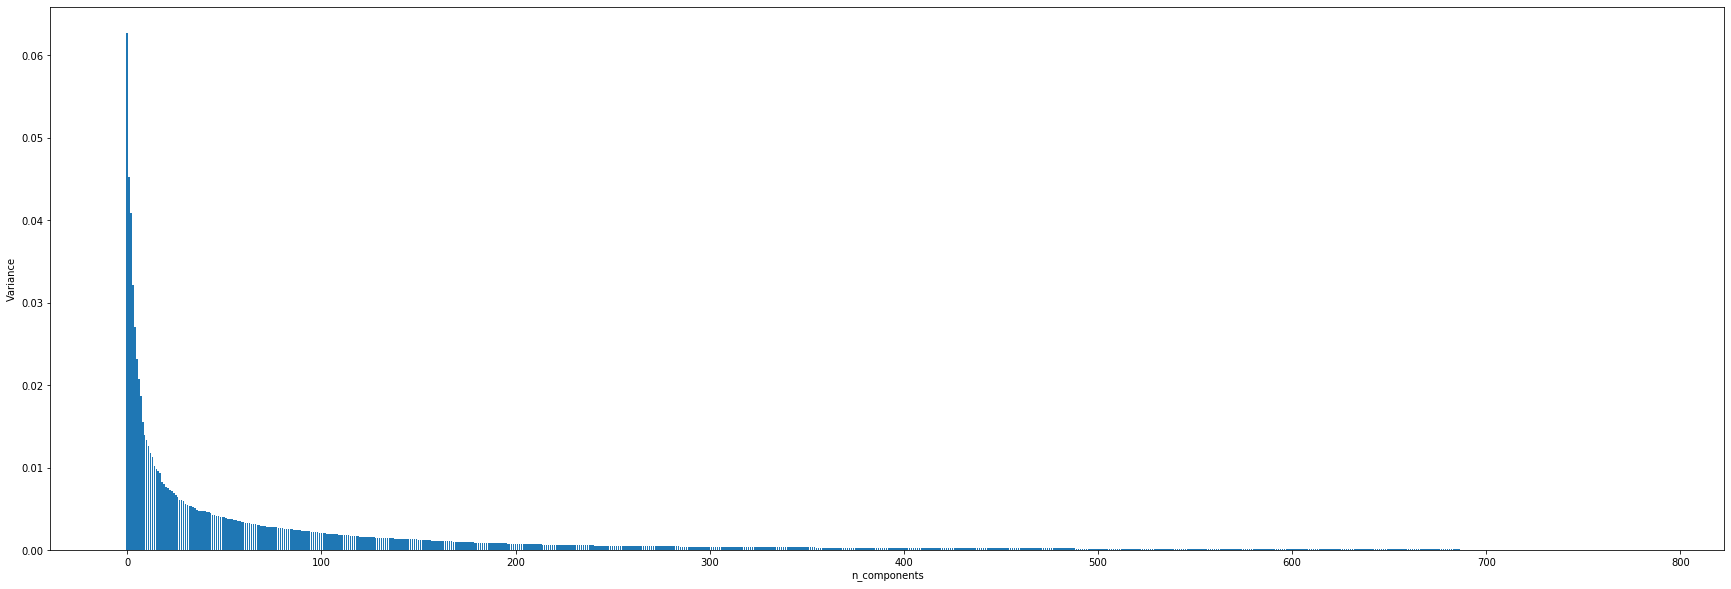

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardized data
sc = StandardScaler().fit(train_b)
X_std_train = sc.transform(train_b)
X_std_test = sc.transform(test_b)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
#train_pca_b = sklearn_pca.transform(X_std_train)
#test_pca_b = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [123]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca_b = sklearn_pca.fit_transform(X_std_train)
test_pca_b = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca_b.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca_b.shape)

Keeping 90% Info with  287  components
Shape before PCA for Train:  (33600, 784)
Shape after PCA for Train:  (33600, 287)
Shape before PCA for Test:  (8400, 784)
Shape after PCA for Test:  (8400, 287)


In [124]:
start_time = time.time()
clf.fit(train_pca_b[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test_pca_b,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case4=[score,fittime,scoretime]

Time consumed to fit model:  00:00:06
Accuracy for grayscale:  0.9195238095238095
Time consumed to score model:  00:00:08


# summarize the outputs

In [133]:
head =["Accuracy","FittingTime","ScoringTime"]
print("\t\t case1 \t\t\t case2 \t\t\t case3 \t\t\t case4")
for h, c1, c2, c3, c4 in zip(head, case1, case2, case3, case4):
    print("{}\t{}\t{}\t{}\t{}".format(h, c1, c2, c3, c4))

		 case1 			 case2 			 case3 			 case4
Accuracy	0.9122619047619047	0.9122619047619047	0.9192857142857143	0.9195238095238095
FittingTime	10.92042326927185	11.24776029586792	6.197479724884033	6.446115016937256
ScoringTime	23.759875059127808	23.759875059127808	8.871947526931763	8.90765929222107


# Training Data Size vs Accuracy, Fitting & Score Times

In [137]:
from tqdm import tqdm

fit_time=[]
score=[]
score_time=[]

for f in tqdm(range(1000,31000,5000)):
    start_time = time.time()
    clf.fit(train_pca_b[:f], train_labels[:f].values.ravel())
    fit_time.append(time.time() - start_time)
    start_time = time.time()
    score.append(clf.score(test_pca_b, test_labels))
    score_time.append(time.time() - start_time)

100%|████████████████████████████████████████████████| 6/6 [06:15<00:00, 62.51s/it]


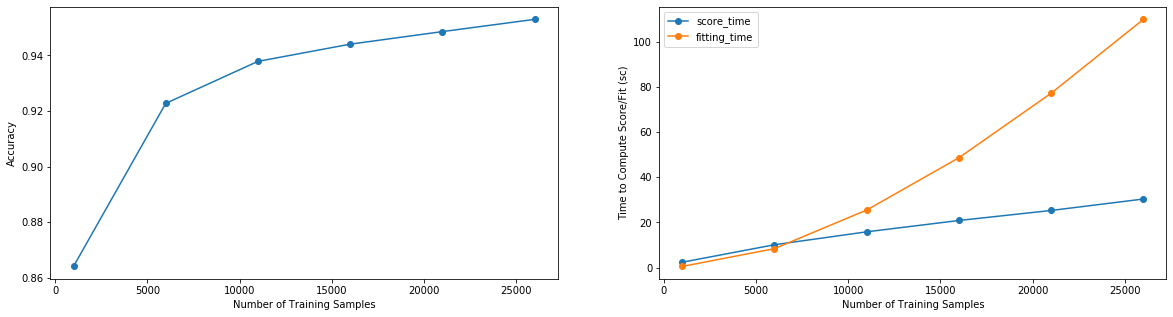

In [138]:
x=list(range(1000,31000,5000))
plt.figure(figsize=[20,5])
ax1=plt.subplot(1,2,1)
ax1.plot(x,score, '-o')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
ax2=plt.subplot(1,2,2)
ax2.plot(x,score_time,'-o')
ax2.plot(x,fit_time,'-o')

plt.xlabel('Number of Training Samples')
plt.ylabel('Time to Compute Score/Fit (sc)')
plt.legend(['score_time','fitting_time'])

# Parameter Selection for SVM using GridSearchCV

Gamma is the parameter of a Gaussian Kernel (to handle non-linear classification) and 


C the parameter for the soft margin cost function, also known as cost of misclassification. A large C gives you low bias and high variance and vice versa.

In [140]:
clf.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=7,
    shrinking=True, tol=0.001, verbose=False)>

In [141]:
parameters = {'gamma': [1, 0.1, 0.01, 0.001],
             'C': [1000, 100, 10, 1]} 

p = GridSearchCV(clf , param_grid=parameters, cv=3)

In [142]:
# pca reduction
X=train_pca_b[:i]
y=train_labels[:i].values.ravel()
start_time = time.time()
p.fit(X,y)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Time consumed to fit model:  00:06:01


In [143]:
print("Scores for all Parameter Combination: \n",p.cv_results_['mean_test_score'])
print("\nOptimal C and Gamma Combination: ",p.best_params_)
print("\nMaximum Accuracy acheieved on LeftOut Data: ",p.best_score_)

Scores for all Parameter Combination: 
 [0.1134 0.1866 0.7904 0.9316 0.1134 0.1866 0.7904 0.9316 0.1134 0.1866
 0.7904 0.9326 0.1134 0.183  0.7732 0.9224]

Optimal C and Gamma Combination:  {'C': 10, 'gamma': 0.001}

Maximum Accuracy acheieved on LeftOut Data:  0.9326


---

## checking the actual params

In [145]:
C = p.best_params_["C"]
gamma = p.best_params_["gamma"]
clf=svm.SVC(C=C, gamma=gamma, random_state=7)

In [146]:
clf.fit(train_pca_b[:i], train_labels[:i].values.ravel())
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
print("Accuracy for binary: ",clf.score(test_pca_b,test_labels))

Time consumed to fit model:  00:10:05
Accuracy for binary:  0.9384523809523809


# submission kernel

In [154]:
data.shape
train_data = data
train_label = label
test_data = pd.read_csv('../Input Files/Digit Recognizer/test.csv')

In [152]:
train_data[train_data>0]=1
test_data[test_data>0]=1

In [155]:
sc = StandardScaler().fit(train_data)
X_std_train = sc.transform(train_data)
X_std_test = sc.transform(test_data)

In [156]:
sklearn_pca = sklearnPCA().fit(X_std_train)

In [158]:
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

Text(0, 0.5, 'Variance')

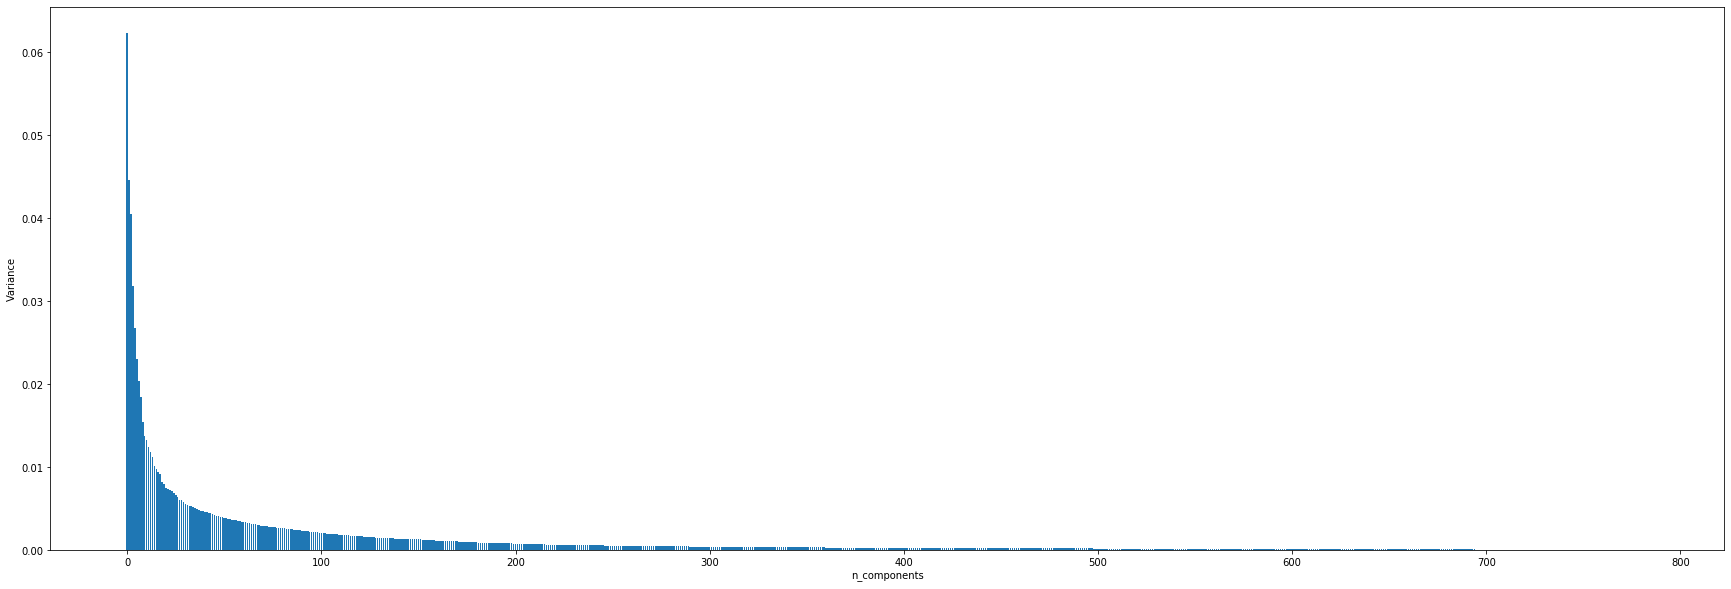

In [159]:
plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [160]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca_b = sklearn_pca.fit_transform(X_std_train)
test_pca_b = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca_b.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca_b.shape)

Keeping 90% Info with  293  components
Shape before PCA for Train:  (42000, 784)
Shape after PCA for Train:  (42000, 293)
Shape before PCA for Test:  (28000, 784)
Shape after PCA for Test:  (28000, 293)


In [164]:
start_time = time.time()
clf.fit(train_pca_b, label.values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))

Time consumed to fit model:  00:01:41


In [165]:
start_time = time.time()
result=clf.predict(test_pca_b)
print("Accuary for Binary(PCA):", result)

Accuary for Binary(PCA): [7 7 7 ... 7 7 7]


In [166]:
result

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

In [167]:
data_to_submit = pd.DataFrame({
    'ImageId':test_data.index.values+1,
    'Label':result
})

data_to_submit.index=data_to_submit['ImageId'].values
data_to_submit.to_csv('result.csv', index=False)

In [168]:
data_to_submit

,ImageId,Label
1,1,7
2,2,7
3,3,7
4,4,7
5,5,7
6,6,7
7,7,7
8,8,7
9,9,7
10,10,7
